In [1]:
#Data Science Project - Yelp Reviews

import pandas as pd
%matplotlib inline
import json

#cant import geopandas
#import geopandas as gpd

from matplotlib import style
style.use('dark_background')
print(pd.__version__)

1.2.1


In [3]:
df_bus = pd.read_json('yelp_academic_dataset_business.json', lines=True , orient='columns')

In [4]:
df_rev = pd.read_json('yelp_academic_dataset_review.json', lines=True , orient='columns')

In [8]:
df_user = pd.read_json('yelp_academic_dataset_user.json', lines=True , orient='columns')
df_user.head()

,yelping_since,votes,review_count,name,user_id,friends,fans,average_stars,type,compliments,elite
0,2004-10,"{'funny': 167, 'useful': 282, 'cool': 246}",108,Russel,18kPq7GPye-YQ3LyKyAZPw,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",69,4.14,user,"{'profile': 8, 'cute': 15, 'funny': 11, 'plain...","[2005, 2006]"
1,2004-10,"{'funny': 8399, 'useful': 15242, 'cool': 12091}",1292,Jeremy,rpOyqD_893cqmDAtJLbdog,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",1345,3.67,user,"{'profile': 117, 'cute': 204, 'funny': 594, 'p...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
2,2004-10,"{'funny': 722, 'useful': 1349, 'cool': 657}",395,Michael,4U9kSBLuBDU391x6bxU-YA,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",105,3.68,user,"{'profile': 9, 'cute': 22, 'funny': 96, 'plain...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
3,2004-10,"{'funny': 1, 'useful': 11, 'cool': 5}",11,Ken,fHtTaujcyKvXglE33Z5yIw,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",2,4.64,user,{'cute': 2},[]
4,2004-10,"{'funny': 13, 'useful': 37, 'cool': 16}",66,Katherine,SIBCL7HBkrP4llolm4SC2A,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",5,3.80,user,"{'cute': 2, 'plain': 2, 'writer': 2, 'note': 1...",[2005]


In [10]:
#Firstly I want to filter for metropolitan area the business.json file
bus_short=df_bus[["categories","business_id","city","state","review_count"]] #taking 3 columns from the business.json dataframe
rev_short=df_rev[["business_id","user_id"]] #taking 3 columns from the review.json dataframe
user_short=df_user[["user_id","review_count"]]

In [273]:
#filter specific rows from a DataFrame 
lv=bus_short[bus_short["city"] == 'Las Vegas']
#Now I want to find the empirical PDF of the number of reviews received for the individual business in LA
lv.head()

,categories,business_id,city,state,review_count
8420,"[Doctors, Medical Centers, Health & Medical, F...",F7l0UuTvf_734UMAwsJfkg,Las Vegas,NV,4
8426,"[Books, Mags, Music & Video, Shopping, Booksto...",uzztTCsg3XAKlYqmLO40aw,Las Vegas,NV,20
8439,"[Home Services, Real Estate, Apartments]",YWLO4XUYsyMyEc0ciUAp0Q,Las Vegas,NV,11
8445,"[Women's Clothing, Men's Clothing, Fashion, Sh...",IspFZDcpu9W5NvvJ7QgJZg,Las Vegas,NV,8
8450,"[Hair Salons, Beauty & Spas]",Dvulg9cc3XHkt5DkBUekhw,Las Vegas,NV,17


In [86]:
##################### converting the dataframe to an array to find user IDs for RQ_1_1
import numpy as np
lvtoarr = lv["business_id"].to_numpy()
np.shape(lvtoarr)

(19328,)

In [87]:
del df_bus #for memory purposes

In [94]:
################This loop sorts by business id from the filtered business.json file and matches 
#it to the review file (similar to inner join merging for business_id) 
DF = []
for i in lvtoarr:
    df_loop = rev_short.loc[rev_short['business_id']==i]
    DF.append(df_loop)
df4 = pd.concat(DF)



In [104]:
#######This sorts the array by user ids and counts

vals = df4.groupby('user_id').size().to_numpy()
vals.shape

(316475,)

In [221]:
vals

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

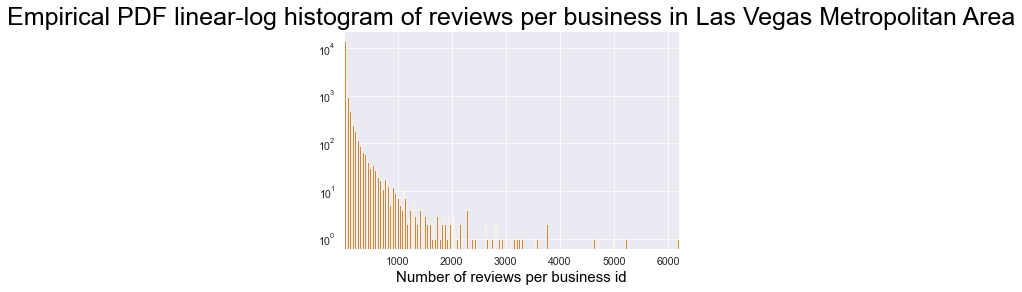

mean 59.174668874172184 standard variation 195.94722758761313


In [223]:
############################################################################################################
##########RQ.1_Subquestion_2 Plotting the empirical PDF & CDF in linear log for the business reviews##################
###########################################################################################################
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
fig, ax = plt.subplots()
# Plotting the empirical PDF in log log for the business reviews
xx=(lv['review_count'])

#normalize the empirical
#x = x/len(lv['review_count'])
left_lim = min(xx)
right_lim = max(xx)
 
plt.hist(xx, facecolor = 'peru', edgecolor = 'white', bins=200)
plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.title('Empirical PDF linear-log histogram of reviews per business in Las Vegas Metropolitan Area', fontsize =25, color ="black")
plt.yscale("log")
#plt.xscale("log")
plt.xlim(left_lim,right_lim)

#plt.ylabel('Important var')

plt.show()
print ('mean', xx.mean(), 'standard variation',xx.std())

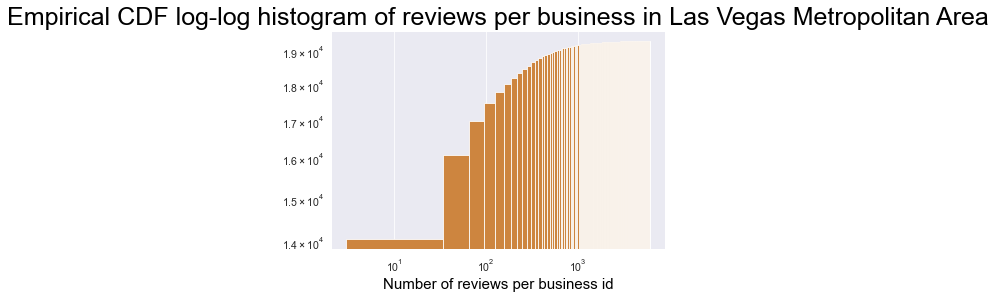

In [225]:
# Plotting the empirical CDF in log log for the business reviews
plt.hist(xx, facecolor = 'peru', edgecolor = 'white', bins=200, cumulative= True)
#plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.title('Empirical CDF log-log histogram of reviews per business in Las Vegas Metropolitan Area', fontsize =25, color ="black")
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.show()



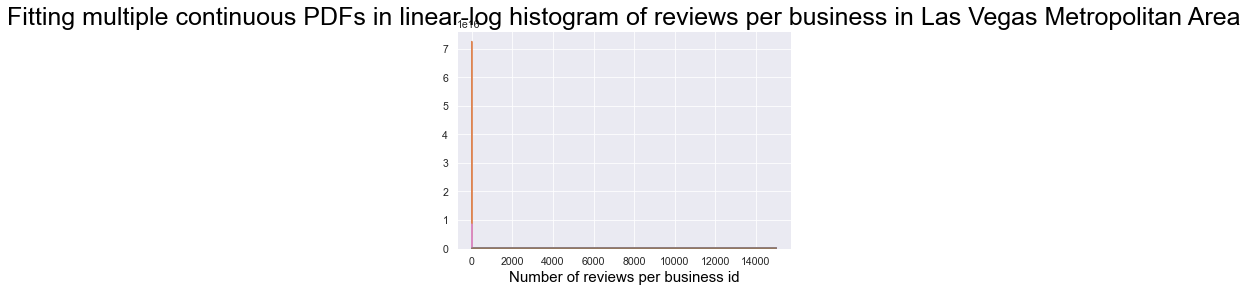

betaprime: statistic=0.07533553556374356, pvalue=7.584245377362451e-96
invgauss: statistic=0.07670186270664872, pvalue=2.416121262903579e-99
logistic: statistic=nan, pvalue=nan
mielke: statistic=nan, pvalue=nan
nct: statistic=0.07264057914792096, pvalue=3.907443873358673e-89
ncf: statistic=0.07428510150096818, pvalue=3.3520255741251743e-93
invgamma: statistic=0.07535051653848387, pvalue=6.948876173901372e-96
levy: statistic=0.07783496520563754, pvalue=2.7245102646858717e-102
invweibull: statistic=0.07979550342440578, pvalue=1.706789925807162e-107
burr12: statistic=0.09145304554941486, pvalue=4.0190155661075903e-141
fatiguelife: statistic=0.09636488287536216, pvalue=1.1328036562159546e-156
pareto: statistic=0.10818501611800421, pvalue=1.8615227925003668e-197
fisk: statistic=0.10818501654665624, pvalue=1.8615160829905987e-197
genpareto: statistic=0.1081850165478875, pvalue=1.8615160637183766e-197
gengamma: statistic=0.10818501654795905, pvalue=1.861516062598376e-197
weibull_min: statisti

In [275]:
#fitting the best continuous distribution using Kolmogorov test for evaluation
#Distribution fit for business reviews 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
plt.hist(xx, facecolor = 'peru', edgecolor = 'white', bins=200)
plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.title('Fitting multiple continuous PDFs in linear-log histogram of reviews per business in Las Vegas Metropolitan Area', fontsize =25, color ="black")
#plt.yscale("log")
size = 15000
x = scipy.arange(size)
results = []
for i in list_of_dists:
    dist = getattr (scipy.stats, i)
    param = dist.fit(lv['review_count'])
    a = scipy.stats.kstest(lv['review_count'], i, args=param)
    results.append((i,a[0],a[1]))
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=i)


plt.show()

results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))
#The solution turns out to be the non central t distribution of NCT
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

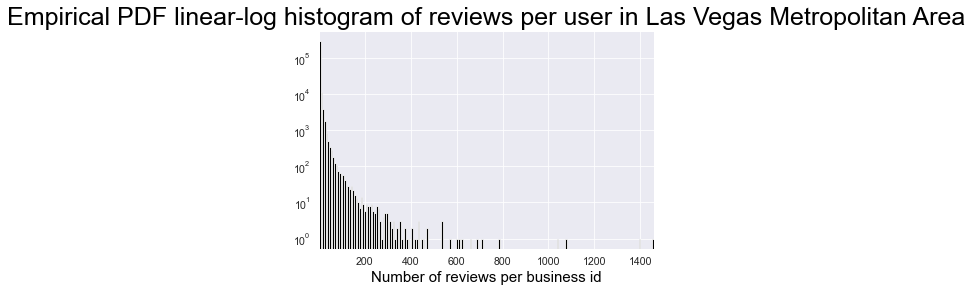

mean 3.261094873212734 standard variation 10.658039793800384


In [224]:
############################################################################################################
#############RQ.1_Subquestion_1 Plotting the empirical CDF & PDF in linear log for the business reviews##################
###########################################################################################################

xl=vals
left_lim = min(xl)
right_lim = max(xl)

plt.hist(xl, facecolor = 'black', edgecolor = 'white', bins=200)
plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.title('Empirical PDF linear-log histogram of reviews per user in Las Vegas Metropolitan Area', fontsize =25, color ="black")
plt.yscale("log")
#plt.xscale("log")

#plt.ylabel('Important var')
plt.xlim(left_lim,right_lim)
plt.show()
print ('mean', xl.mean(), 'standard variation',xl.std())

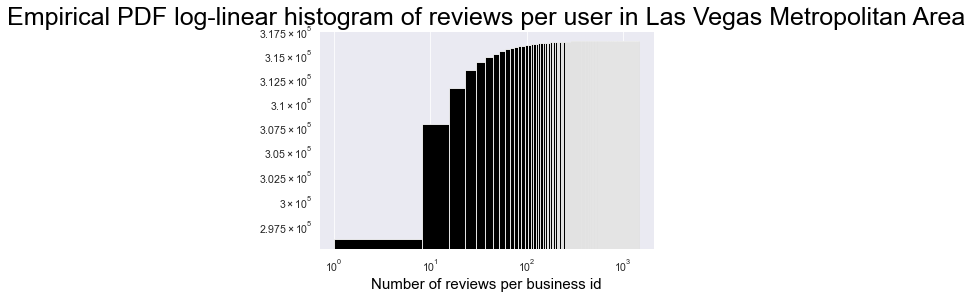

In [226]:
# Plotting the empirical CDF in log log for the user reviews
#xl=(new['review_count'])

#normalize the empirical
#xl = xl/len(new['review_count'])
left_lim = min(xl)
right_lim = max(xl)


plt.hist(xl, facecolor = 'black', edgecolor = 'white', bins=200, cumulative= True)
plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.title('Empirical PDF log-linear histogram of reviews per user in Las Vegas Metropolitan Area', fontsize =25, color ="black")
plt.yscale("log")
plt.xscale("log")

#plt.ylabel('Important var')

plt.show()

In [254]:
############################################################################################################
####Alternative way to locate user ids by business_ids review counts using pandas for RQ1_Subquestion_1##################################
###########################################################################################################
################This sorts by user id 
lv=lv["business_id"]
merged_inner = pd.merge(left = user_short, right=rev_short, left_on='user_id', right_on='user_id', how = 'inner')
#merged_inner = merged_inner[["user_id", "business_id"]]
merged_inner


,user_id,review_count,business_id
0,18kPq7GPye-YQ3LyKyAZPw,108,zMN8UGd1zDEreT58OCdnyg
1,rpOyqD_893cqmDAtJLbdog,1292,hW0Ne_HTHEAgGF1rAdmR-g
2,rpOyqD_893cqmDAtJLbdog,1292,9Y3aQAVITkEJYe5vLZr13w
3,rpOyqD_893cqmDAtJLbdog,1292,cKiTluWCfMQTdmFZIugoiQ
4,rpOyqD_893cqmDAtJLbdog,1292,u9wjRhUjySkHPa_hG3kFOg
...,...,...,...
2685061,q0tofG0bWFv8ou0ea4aAiA,51,DGOlhi2qIxet3t96y3niXw
2685062,q0tofG0bWFv8ou0ea4aAiA,51,HQPyYaaDDcS8NEAnCUCgow
2685063,JV-CHnvX6qrQzRQOL2yxCA,3,K8dQr_82-DMpDudEv8PDmw
2685064,uRM8uxxbhum_Bedx1c1frw,1,GwBzzDNzPYAiN6QQrd37Sw


In [256]:
################This sorts by user id 
merged_inner2 = pd.merge(left=merged_inner, right=lv, left_on='business_id', right_on='business_id', how = 'inner')
#new2 = pd.merge(new, user_short, on = "user_id")
#pd.options.display.max_rows = None
merged_inner2
#new2.head()


,user_id,review_count,business_id
0,rpOyqD_893cqmDAtJLbdog,1292,u9wjRhUjySkHPa_hG3kFOg
1,8_RB3fs5Ywn_ECTmg139Gg,54,u9wjRhUjySkHPa_hG3kFOg
2,BdmONpWokIlU87ANsPs8Tg,570,u9wjRhUjySkHPa_hG3kFOg
3,5hjIpkurvuyF7TiKG2iDXA,173,u9wjRhUjySkHPa_hG3kFOg
4,HgfZyTsFrcS1Bx53z4VM0Q,61,u9wjRhUjySkHPa_hG3kFOg
...,...,...,...
1032050,hLSe97cHKUJog8TnWY1xKg,8,6jdKnIjJ9n5knZoSj7qtDw
1032051,CRq40qBDK8wQmCsSGi5ASA,3,EA-cBa7kdwWUFhsDZhnpsw
1032052,y_hpPfLjrbKLo1DvoDtbCw,13,rlzXDxRcCLQ-tnfuZvLG7Q
1032053,Vlon2bJdT43_1oHSrQsHTQ,271,rlzXDxRcCLQ-tnfuZvLG7Q


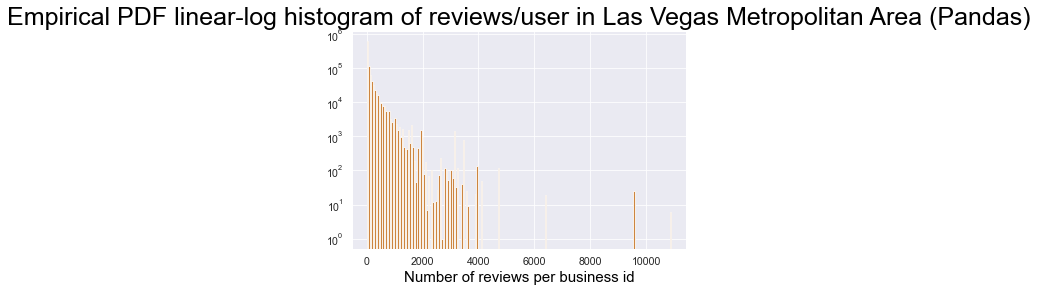

mean 140.78875738211627 standard variation 318.49204801439674


In [262]:
############################################################################################################
##########RQ.1_Subquestion_1 Plotting the empirical PDF in linear log for the business reviews##################
###########################################################################################################

sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
fig, ax = plt.subplots()

xx=(merged_inner2['review_count'])

#normalize the empirical
#x = x/len(lv['review_count'])

 
plt.hist(xx, facecolor = 'peru', edgecolor = 'white', bins=200)
plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.title('Empirical PDF linear-log histogram of reviews/user in Las Vegas Metropolitan Area (Pandas)', fontsize =25, color ="black")
plt.yscale("log")
#plt.xscale("log")
#plt.xlim(left_lim,right_lim)

#plt.ylabel('Important var')

plt.show()
print ('mean', xx.mean(), 'standard variation',xx.std())


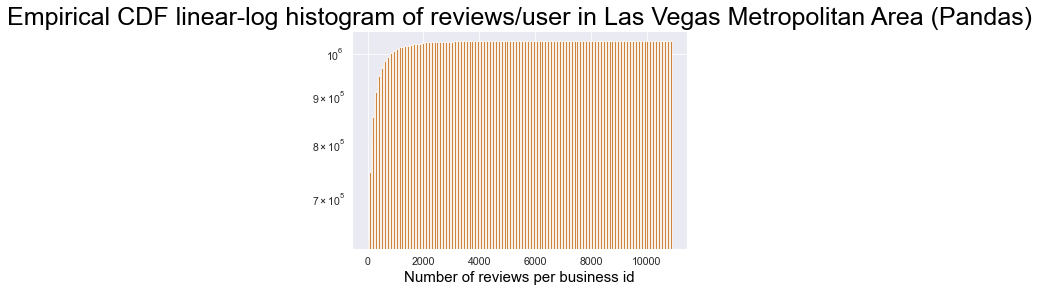

In [269]:
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
fig, ax = plt.subplots()

xx=(merged_inner2['review_count'])

#normalize the empirical
#x = x/len(lv['review_count'])

plt.hist(xx, facecolor = 'peru', edgecolor = 'white', bins=200, cumulative=True)
plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.title('Empirical CDF linear-log histogram of reviews/user in Las Vegas Metropolitan Area (Pandas)', fontsize =25, color ="black")
plt.yscale("log")


plt.show()


In [270]:
import warnings
warnings.filterwarnings("ignore")
#list_of_dists = 'weibull_min','norm','weibull_max','beta','invgauss','uniform','gamma','expon','lognorm','pearson3','triang'
list_of_dists = 'alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max'
print(type(list_of_dists))

<class 'tuple'>


In [278]:
#fitting the best continuous distribution using Kolmogorov test for evaluation
#Distribution fit for user reviews 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
results = []
for i in list_of_dists:
    dist = getattr (scipy.stats, i)
    param = dist.fit(vals)
    a = scipy.stats.kstest(vals, i, args=param)
    results.append((i,a[0],a[1]))
    
plt.show()

results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))
#The solution turns out to be the non central t distribution of NCF
#ncf: statistic=0.30714449067693433, pvalue=0.0
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

alpha: statistic=0.43506438107275436, pvalue=0.0
anglit: statistic=0.6813295150435292, pvalue=0.0
arcsine: statistic=0.9124437712408046, pvalue=0.0
beta: statistic=0.32255089647650864, pvalue=0.0
betaprime: statistic=0.4350016467732688, pvalue=0.0
bradford: statistic=0.9564959446563058, pvalue=0.0
burr: statistic=0.4350643810727546, pvalue=0.0
burr12: statistic=0.5369599494972175, pvalue=0.0
cauchy: statistic=0.5, pvalue=0.0
chi: statistic=0.5058105739127219, pvalue=0.0
chi2: statistic=0.6322578187410307, pvalue=0.0
cosine: statistic=0.623797038408362, pvalue=0.0
dgamma: statistic=0.309058466284273, pvalue=0.0
dweibull: statistic=0.4999999998267087, pvalue=0.0
erlang: statistic=0.5649350762541618, pvalue=0.0
expon: statistic=0.5649356189272454, pvalue=0.0
exponnorm: statistic=0.5640292445403814, pvalue=0.0
exponweib: statistic=0.5649079456673516, pvalue=0.0
exponpow: statistic=0.5649356173187559, pvalue=0.0
f: statistic=0.4797664178064128, pvalue=0.0
fatiguelife: statistic=0.5124492798